For each protein, the largest Kp cluster was considered as "conserved" Kp sequences and were combined with non-Kp sequences to perform clustering.  
Clustering was computed by CD-HIT with minimum sequence identity threshold of 95%.  
This notebook records the analyses on the clustering output.

In [2]:
#| code-fold: true

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
font = {'family': 'sans-serif', 'serif': 'Helvetica',
        'size': 14}
plt.rc('font', **font)
legnd = {'fontsize': 20, 'handlelength': 1.5}
plt.rc('legend', **legnd)

import warnings
warnings.filterwarnings('ignore')

In [3]:
#| code-fold: true

def largest_Kp_clstr(clstr_table):
    clstr_Kp = clstr_table.loc[clstr_table['species'] == "Klebsiella pneumoniae",:]
    clstr_count = clstr_Kp.groupby(["cdhit_cluster"])[['accession_number']].count()
    max_count = clstr_count['accession_number'].max()
    return clstr_count[clstr_count['accession_number']==max_count].index[0]

def analyze(clstr_table_file, Kp_clstr_min=10):
    clstr_table = pd.read_csv(clstr_table_file, sep="\t")
    clstr_sp_count = clstr_table.groupby(["cdhit_cluster", 'species'])[['accession_number']].count()

    clstr_sp_count_mat = pd.pivot(clstr_sp_count.reset_index(), index="cdhit_cluster", columns="species", values=["accession_number"])
    clstr_sp_count_mat.columns = clstr_sp_count_mat.columns.droplevel(level=0)

    sig_clstr = (clstr_sp_count_mat.sum(axis=1) > Kp_clstr_min).to_list()
    clstr_sp_count_mat.index[sig_clstr]

    clstr_sp_percent_sp = clstr_sp_count_mat.apply(lambda x: x/x.sum()*100, axis=0)
    clstr_sp_percent_clstr = clstr_sp_count_mat.apply(lambda x: x/x.sum(), axis=1)

    plot_mat = clstr_sp_percent_sp[sig_clstr]
    annot_mat = clstr_sp_percent_clstr[sig_clstr]
    nrows = plot_mat.shape[0]
    ncols = plot_mat.shape[1]
    cellsize = 0.8 #inch
    marg_top = 0.7
    marg_bottom = 0.7
    marg_left = 0.7
    marg_right = 0.7
    delta = 0.0 if nrows > 2 else 0.8 if nrows==2 else 1.0
    figwidth = cellsize * ncols + marg_left + marg_right 
    figheight = cellsize * nrows + marg_top + marg_bottom + delta
    f0, a0 = plt.subplots(figsize=(figwidth, figheight))
    f0.subplots_adjust(bottom=marg_bottom/figheight, top=1.-marg_top/figheight,
                       left=marg_left/figwidth, right=1.-marg_right/figwidth)
    # f0, a0 = plt.subplots(figsize=(0.5*len(clstr_sp_percent_sp.columns)+5, 
    #                                0.5*len(sig_clstr)))
    # f0, a0 = plt.subplots()
    sns.heatmap(plot_mat, 
                vmin=0.00, vmax=100.00, cmap=sns.color_palette("ch:s=-.2,r=.5", as_cmap=True), 
                annot=annot_mat, fmt=".2f", annot_kws={'fontsize': 11},
                linewidths=0.01, square=True,
                cbar=True, cbar_kws={'label': "% species sequences\nassigned to a cluster"},
                ax=a0)

    focus_clstr = largest_Kp_clstr(clstr_table)

    focus_table = clstr_table.loc[clstr_table['cdhit_cluster']==focus_clstr,:]

    f1, a1 = plt.subplots(figsize=(5,4))
    sns.boxplot(data=focus_table, x="species", y="identity",
                palette="Dark2", width=0.6, boxprops={"alpha":0.4}, showfliers=False,
                ax=a1)
    sns.stripplot(data=focus_table, x="species", y="identity",
                  palette="Dark2", ax=a1)
    a1.tick_params(axis='x', rotation=90)
    a1.set_title(focus_clstr)

    f2, a2 = plt.subplots(figsize=(5,4))
    sns.boxplot(data=focus_table, x="species", y="length", 
            palette="Dark2", width=0.6, boxprops={"alpha":0.4}, showfliers=False, 
            ax=a2)
    sns.stripplot(data=focus_table, x="species", y="length",
                palette="Dark2", ax=a2)
    a2.tick_params(axis='x', rotation=90)
    a2.set_title(focus_clstr)

    plt.close()

    clstr_sp_count.columns = ['number_of_sequences']
    return (clstr_sp_count, f0, f1, f2)

def make_filename(protein_name, Kp_clstr):
    filename = "../" + protein_name + "/" + protein_name + ".Kp_cluster" + Kp_clstr + ".nonKp.cdhit95.tsv" 
    return filename

# *mrkA*

In [3]:
%%capture
target = "mrkA"
Kp_clstr = "0"
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file=make_filename(target, Kp_clstr))

In [4]:
#| label: mrkA-table
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella aerogenes                          1
Cluster 1     Klebsiella grimontii                         29
              Klebsiella huaxiensis                         1
              Klebsiella michiganensis                     61
              Klebsiella oxytoca                           33
              Klebsiella pasteurii                          4
              Klebsiella pneumoniae                      1666
              Klebsiella quasipneumoniae                  106
              Klebsiella quasivariicola                     1
              Klebsiella variicola                          3
Cluster 2     Klebsiella africana                           4
              Klebsiella oxytoca                            1
              Klebsiella pneumoniae                       129
              Klebsiella quasipneumoniae                    6
              Klebsiella variicola                         72
Cluster 3     Klebsiella pneumoniae                         2
Cluster 4     Klebsiella quasipneumoniae                    1

In [5]:
#| label: fig-mrkA-heatmap
#| fig-cap: "*mrkA*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

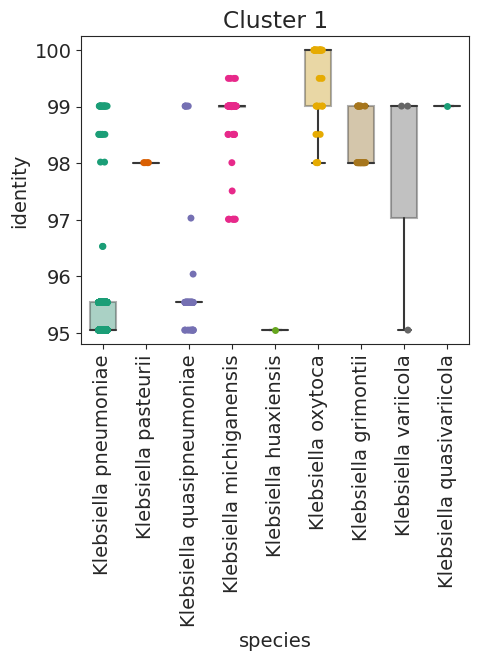

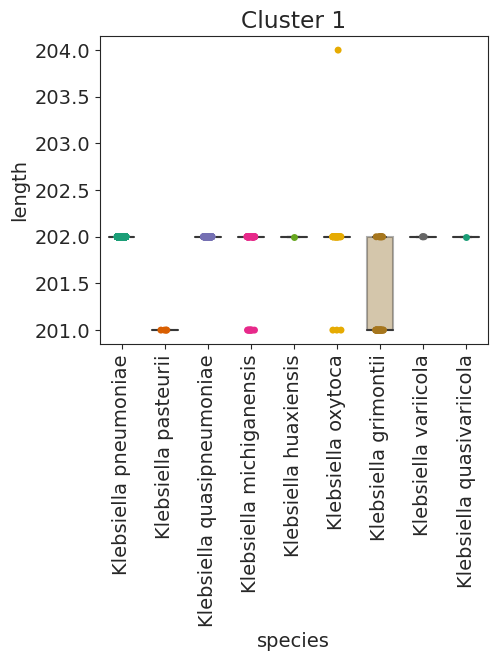

In [6]:
#| label: fig-mrkA-big-Kp-clstr
#| fig-cap: "*mrkA*. BLAST identity (compared to ADB25079.1, *K. oxytoca*, 204aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

# *phoE*

In [7]:
%%capture
target = "phoE"
Kp_clstr = "0"
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file=make_filename(target, Kp_clstr))

In [8]:
#| label: phoE-table
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella michiganensis                      2
              Klebsiella oxytoca                            1
Cluster 1     Klebsiella aerogenes                         60
              Klebsiella africana                           4
              Klebsiella pneumoniae                      2863
              Klebsiella quasipneumoniae                  265
              Klebsiella quasivariicola                    11
              Klebsiella variicola                        126
Cluster 2     Klebsiella grimontii                         34
              Klebsiella huaxiensis                         5
              Klebsiella michiganensis                     75
              Klebsiella oxytoca                           23
              Klebsiella pasteurii                         15
              Klebsiella spallanzanii                       3
Cluster 3     Klebsiella indica                             2
Cluster 4     Klebsiella aerogenes                         14
Cluster 5     Klebsiella oxytoca                           27
Cluster 6     Klebsiella variicola                         21

In [9]:
#| label: fig-phoE-heatmap
#| fig-cap: "*phoE*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

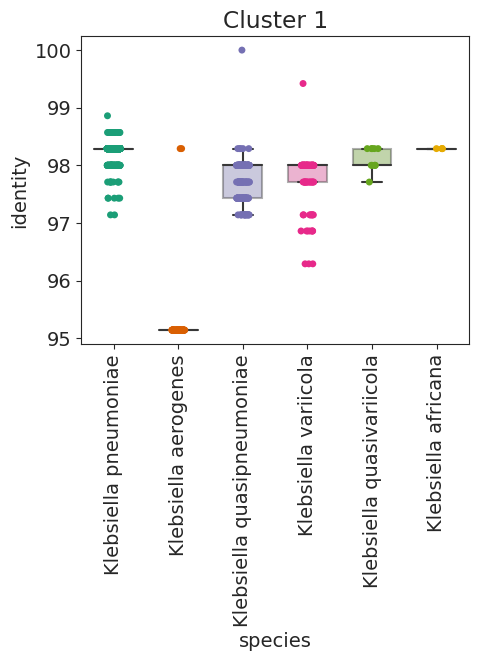

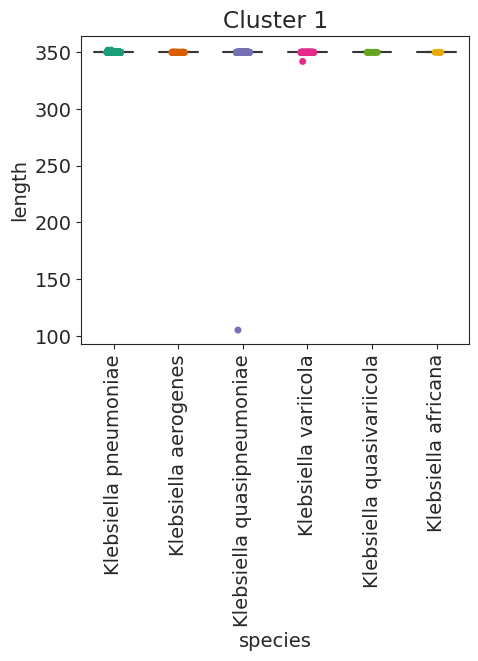

In [10]:
#| label: fig-phoE-big-Kp-clstr
#| fig-cap: "*phoE*. BLAST identity (compared to WP_227541383.1, *K. pneumoniae*, 352aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

# *fimH*

In [11]:
%%capture
target = "fimH"
Kp_clstr = "0"
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file=make_filename(target, Kp_clstr))

In [12]:
#| label: fimH-table
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella aerogenes                          1
Cluster 1     Klebsiella michiganensis                      1
Cluster 2     Klebsiella variicola                          2
Cluster 3     Klebsiella michiganensis                      1
Cluster 4     Klebsiella grimontii                          1
Cluster 5     Klebsiella oxytoca                            1
Cluster 6     Klebsiella aerogenes                          2
              Klebsiella pneumoniae                      2062
              Klebsiella quasipneumoniae                  120
              Klebsiella quasivariicola                     6
              Klebsiella variicola                        108
Cluster 7     Klebsiella grimontii                          2
              Klebsiella michiganensis                      3
Cluster 8     Klebsiella aerogenes                          2
Cluster 9     Klebsiella aerogenes                          8

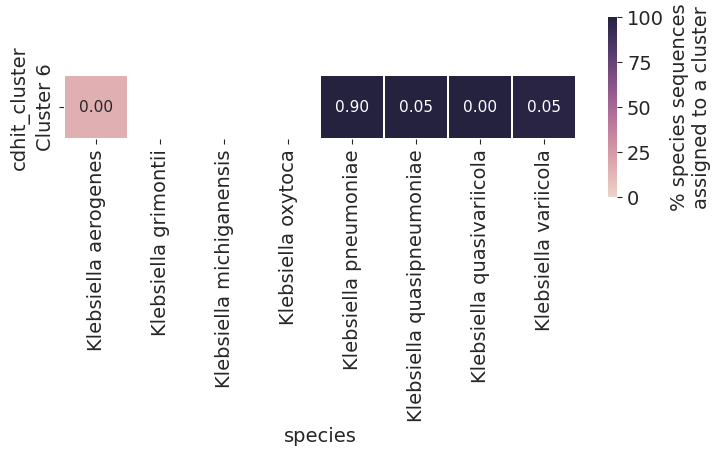

In [13]:
#| label: fig-fimH-heatmap
#| fig-cap: "*fimH*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

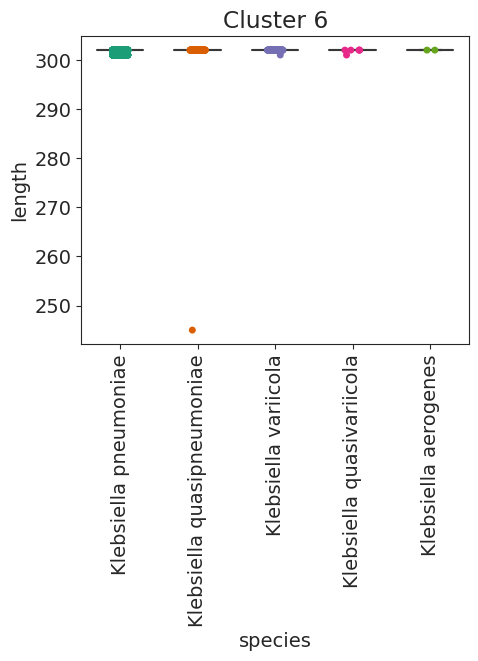

In [14]:
#| label: fig-fimH-big-Kp-clstr
#| fig-cap: "*fimH*. BLAST identity (compared to CAI3912655.1, *K. pneumoniae*, 302aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

# *fepA*

In [15]:
%%capture
target = "fepA"
Kp_clstr = "1"
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file=make_filename(target, Kp_clstr))

In [16]:
#| label: fepA-table
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella grimontii                          1
Cluster 1     Klebsiella quasipneumoniae                    7
              Klebsiella variicola                          9
Cluster 2     Klebsiella grimontii                          2
              Klebsiella michiganensis                      1
              Klebsiella pasteurii                         12
Cluster 3     Klebsiella quasipneumoniae                    1
              Klebsiella variicola                          3
Cluster 4     Klebsiella oxytoca                            1
Cluster 5     Klebsiella africana                           4
              Klebsiella pneumoniae                      1689
              Klebsiella quasipneumoniae                  155
              Klebsiella quasivariicola                     7
              Klebsiella variicola                        113
Cluster 6     Klebsiella aerogenes                         66
Cluster 7     Klebsiella grimontii                          1

In [17]:
#| label: fig-fepA-heatmap
#| fig-cap: "*fepA*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

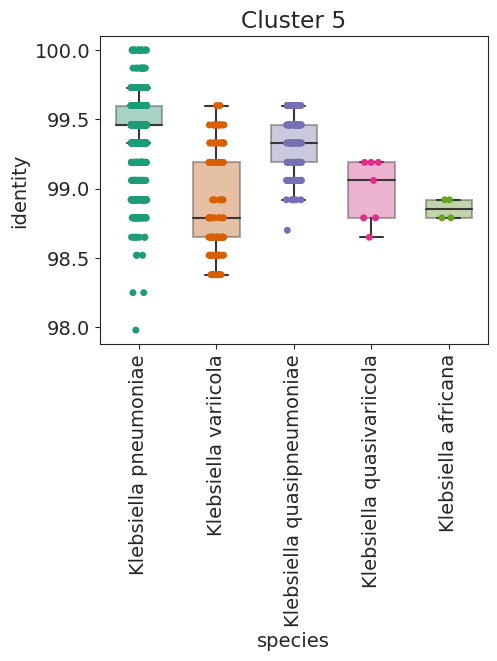

In [18]:
#| label: fig-fepA-big-Kp-clstr
#| fig-cap: "*fepA*. BLAST identity (compared to WGL04146.1, *K. pneumoniae*, 742aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

# Colicin I receptor

In [19]:
%%capture
target = "colicinI"
Kp_clstr = "1"
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file=make_filename(target, Kp_clstr))

In [20]:
#| label: colicinI-table
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella spallanzanii                       1
Cluster 1     Klebsiella oxytoca                            1
Cluster 10    Klebsiella aerogenes                          2
              Klebsiella africana                           1
              Klebsiella pneumoniae                      4016
              Klebsiella quasipneumoniae                  131
              Klebsiella quasivariicola                     8
              Klebsiella variicola                        123
Cluster 11    Klebsiella grimontii                          6
              Klebsiella huaxiensis                         3
              Klebsiella michiganensis                     26
              Klebsiella oxytoca                           79
              Klebsiella pasteurii                         12
              Klebsiella spallanzanii                       3
Cluster 12    Klebsiella aerogenes                         25
Cluster 13    Klebsiella quasipneumoniae                    1
Cluster 14    Klebsiella variicola                          1
Cluster 15    Klebsiella michiganensis                      1
Cluster 16    Klebsiella grimontii                          1
Cluster 17    Klebsiella michiganensis                      1
Cluster 2     Klebsiella oxytoca                            1
Cluster 3     Klebsiella michiganensis                      3
              Klebsiella oxytoca                            1
              Klebsiella quasipneumoniae                    5
              Klebsiella variicola                          6
Cluster 4     Klebsiella variicola                          2
Cluster 5     Klebsiella huaxiensis                         2
              Klebsiella spallanzanii                       3
Cluster 6     Klebsiella oxytoca                            5
Cluster 7     Klebsiella oxytoca                            1
Cluster 8     Klebsiella grimontii                          1
              Klebsiella pasteurii                         12
Cluster 9     Klebsiella oxytoca                            1

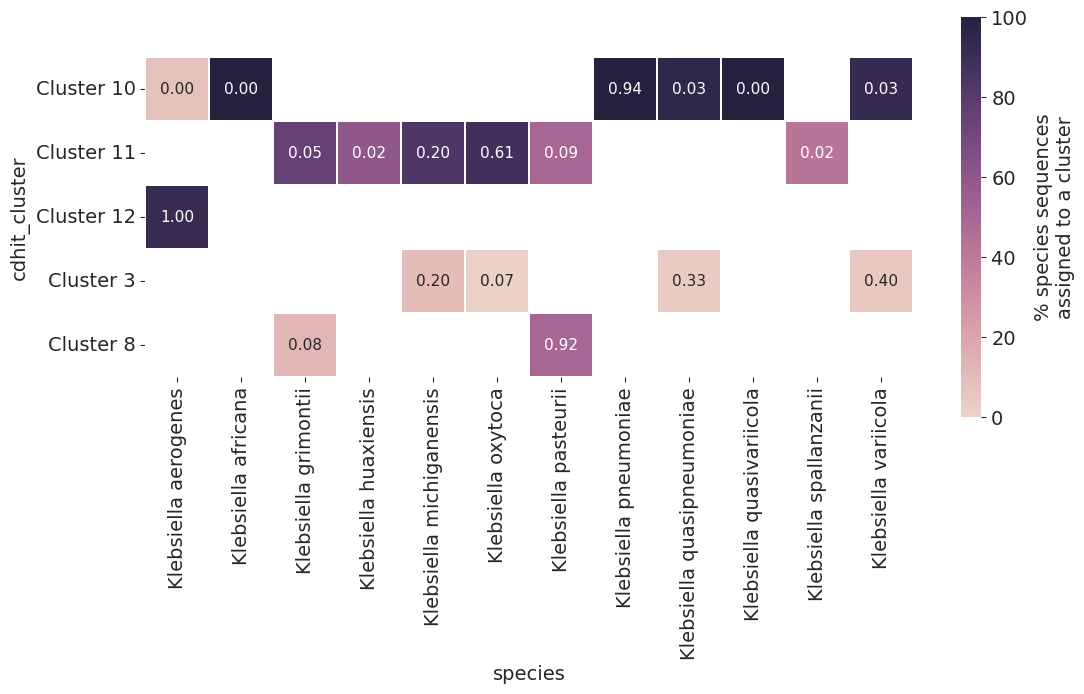

In [21]:
#| label: fig-colicinI-heatmap
#| fig-cap: "Colicin I receptor. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

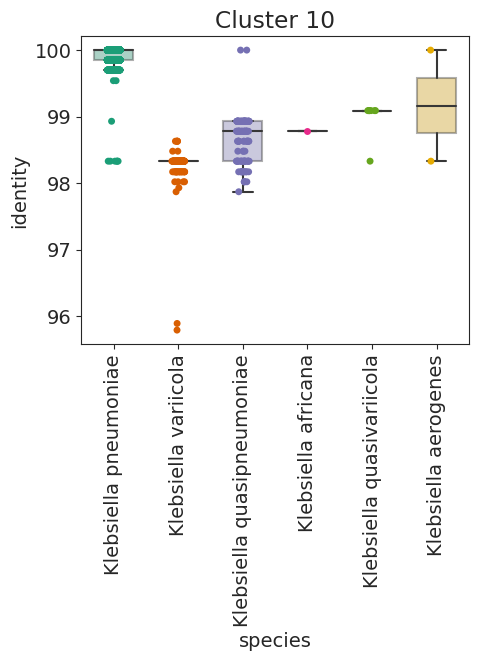

In [22]:
#| label: fig-colicinI-big-Kp-clstr
#| fig-cap: "Colicin I receptor. BLAST identity (compared to WAU42624.1, *K. pneumoniae*, 657aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

# *ompA*
### 95% minimum identity

In [13]:
%%capture
target = "ompA"
Kp_clstr = "0"
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file=make_filename(target, Kp_clstr))

In [14]:
#| label: ompA-table
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella aerogenes                          3
              Klebsiella grimontii                         25
              Klebsiella huaxiensis                         3
              Klebsiella indica                             1
              Klebsiella michiganensis                     57
              Klebsiella oxytoca                           76
              Klebsiella pasteurii                          3
              Klebsiella pneumoniae                      5134
              Klebsiella quasipneumoniae                  140
              Klebsiella quasivariicola                     1
              Klebsiella spallanzanii                       1
              Klebsiella variicola                          2
Cluster 1     Klebsiella pneumoniae                         4
              Klebsiella quasipneumoniae                  133
              Klebsiella variicola                          1
Cluster 2     Klebsiella aerogenes                         49
              Klebsiella africana                           5
              Klebsiella quasivariicola                    11
              Klebsiella variicola                        178
Cluster 3     Klebsiella oxytoca                            1
Cluster 4     Klebsiella aerogenes                         16
Cluster 5     Klebsiella oxytoca                            1
Cluster 6     Klebsiella oxytoca                            1
Cluster 7     Klebsiella oxytoca                            1
Cluster 8     Klebsiella quasipneumoniae                   29
              Klebsiella variicola                         33
Cluster 9     Klebsiella michiganensis                      3
              Klebsiella oxytoca                            4

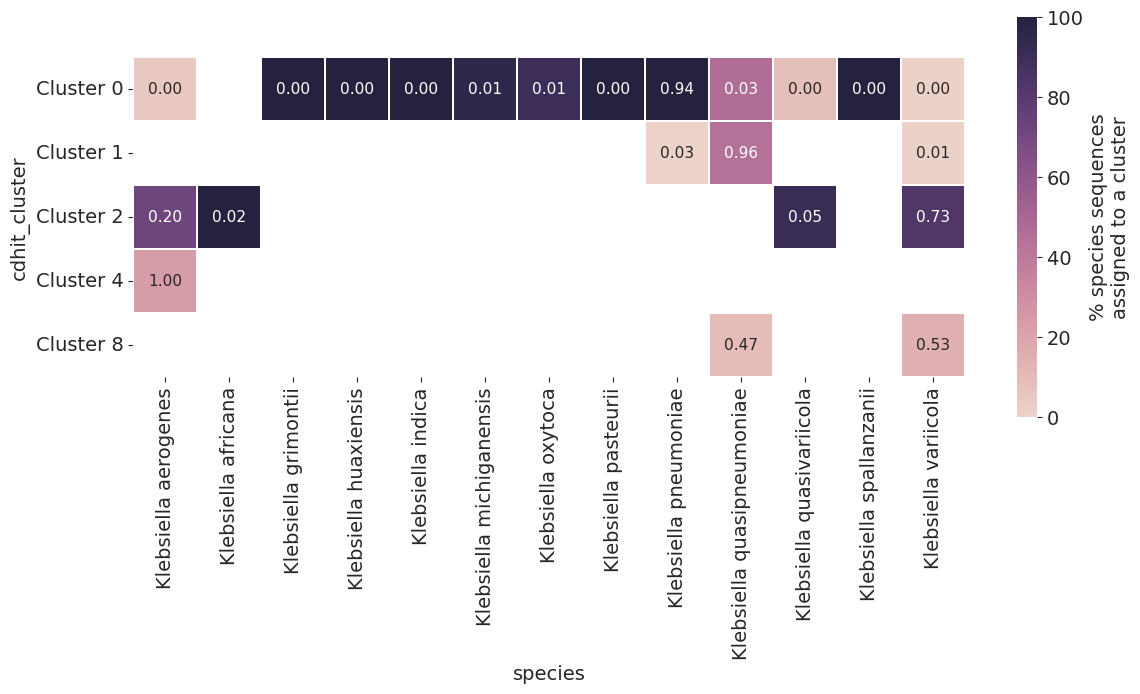

In [15]:
#| label: fig-ompA-heatmap
#| fig-cap: "*ompA*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

In [16]:
#| label: fig-ompA-big-Kp-clstr
#| fig-cap: "*ompA*. BLAST identity (compared to CSNU34826.1, *K. grimontii*, 374aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

### 98% minimum identity

In [4]:
%%capture
target = "ompA"
Kp_clstr = "0"
filename = "../" + target + "/" + target + ".Kp_cluster" + Kp_clstr + ".nonKp.cdhit98.tsv" 
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file=filename)

In [5]:
#| label: ompA-table-98
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella grimontii                         25
              Klebsiella huaxiensis                         3
              Klebsiella michiganensis                     57
              Klebsiella oxytoca                           76
              Klebsiella pasteurii                          3
              Klebsiella spallanzanii                       1
Cluster 1     Klebsiella aerogenes                          3
              Klebsiella pneumoniae                      5138
              Klebsiella quasipneumoniae                  270
              Klebsiella quasivariicola                     1
              Klebsiella variicola                          2
Cluster 10    Klebsiella oxytoca                            1
Cluster 11    Klebsiella oxytoca                            1
Cluster 12    Klebsiella quasipneumoniae                    1
Cluster 13    Klebsiella quasipneumoniae                   29
Cluster 14    Klebsiella variicola                         33
Cluster 15    Klebsiella michiganensis                      3
              Klebsiella oxytoca                            1
Cluster 16    Klebsiella oxytoca                            3
Cluster 2     Klebsiella aerogenes                          1
              Klebsiella africana                           5
              Klebsiella quasivariicola                    11
              Klebsiella variicola                        178
Cluster 3     Klebsiella quasipneumoniae                    2
Cluster 4     Klebsiella oxytoca                            1
Cluster 5     Klebsiella variicola                          1
Cluster 6     Klebsiella indica                             1
Cluster 7     Klebsiella aerogenes                         62
Cluster 8     Klebsiella aerogenes                          2
Cluster 9     Klebsiella oxytoca                            1

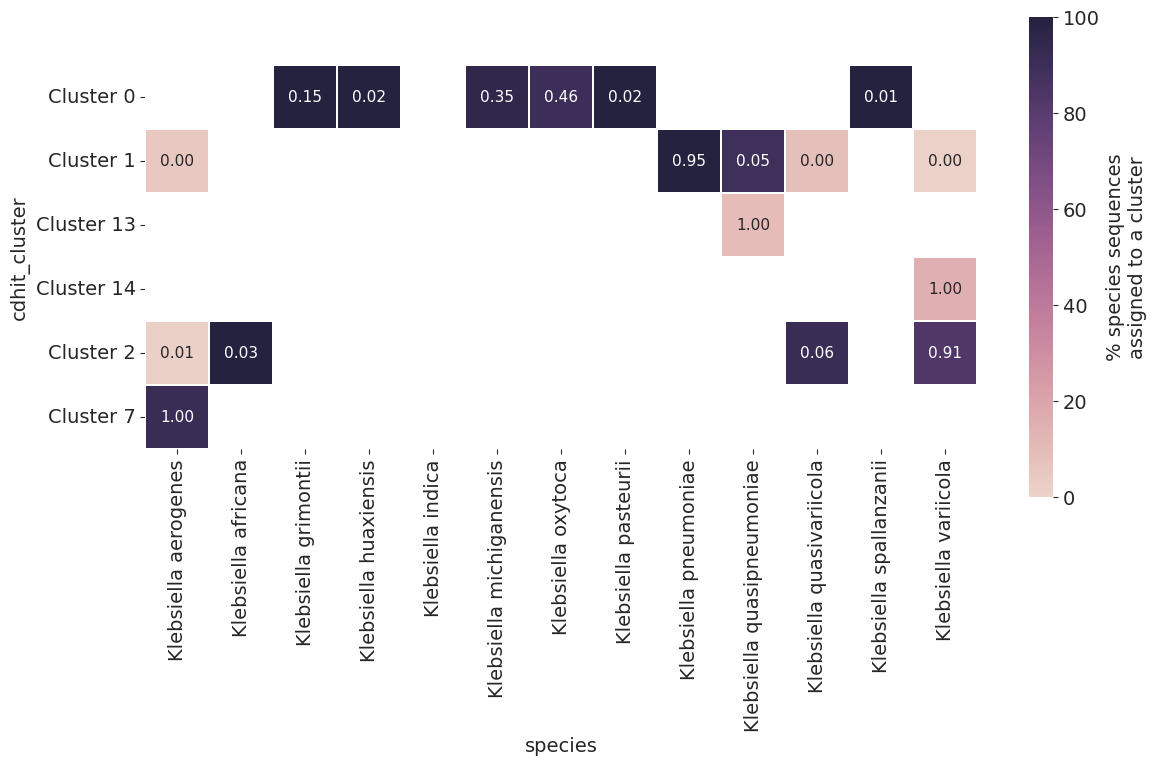

In [6]:
#| label: fig-ompA-heatmap-98
#| fig-cap: "*ompA*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

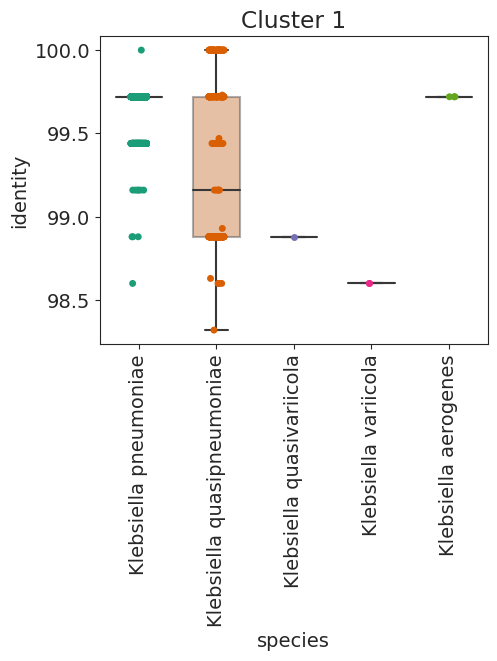

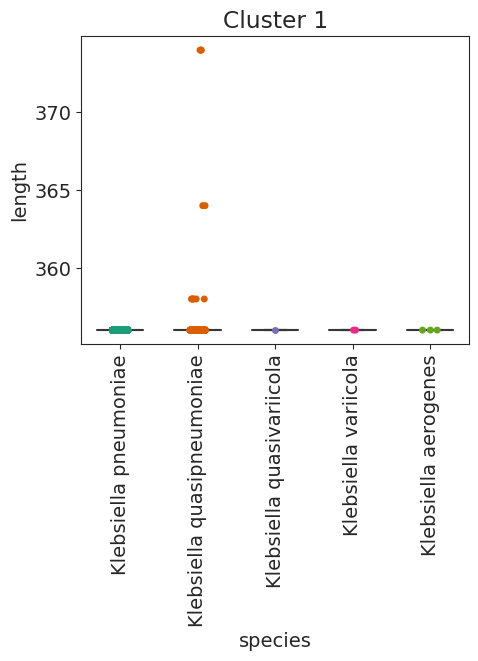

In [7]:
#| label: fig-ompA-big-Kp-clstr-98
#| fig-cap: "*ompA*. BLAST identity (compared to CDQ13652.1, *K. quasipneumoniae*, 374aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

# *fecA*
### 95% minimum identity

In [27]:
%%capture
target = "fecA"
Kp_clstr = "1"
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file=make_filename(target, Kp_clstr))

In [28]:
#| label: fecA-table
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella grimontii                         13
              Klebsiella michiganensis                     53
              Klebsiella oxytoca                           44
              Klebsiella quasipneumoniae                    1
              Klebsiella spallanzanii                       1
              Klebsiella variicola                          2
Cluster 1     Klebsiella huaxiensis                         1
              Klebsiella oxytoca                            1
              Klebsiella spallanzanii                       3
Cluster 10    Klebsiella aerogenes                          1
Cluster 11    Klebsiella oxytoca                            1
Cluster 2     Klebsiella indica                             1
Cluster 3     Klebsiella grimontii                         22
              Klebsiella oxytoca                            3
Cluster 4     Klebsiella aerogenes                          3
              Klebsiella grimontii                          5
              Klebsiella michiganensis                      5
              Klebsiella oxytoca                            9
              Klebsiella pneumoniae                         1
              Klebsiella quasipneumoniae                   49
              Klebsiella quasivariicola                     1
              Klebsiella variicola                         29
Cluster 5     Klebsiella oxytoca                            2
Cluster 6     Klebsiella aerogenes                          1
              Klebsiella africana                           1
              Klebsiella pneumoniae                      1303
              Klebsiella quasipneumoniae                   65
              Klebsiella quasivariicola                     4
              Klebsiella variicola                         80
Cluster 7     Klebsiella quasipneumoniae                    2
Cluster 8     Klebsiella grimontii                          1
              Klebsiella pasteurii                         12
Cluster 9     Klebsiella aerogenes                          7

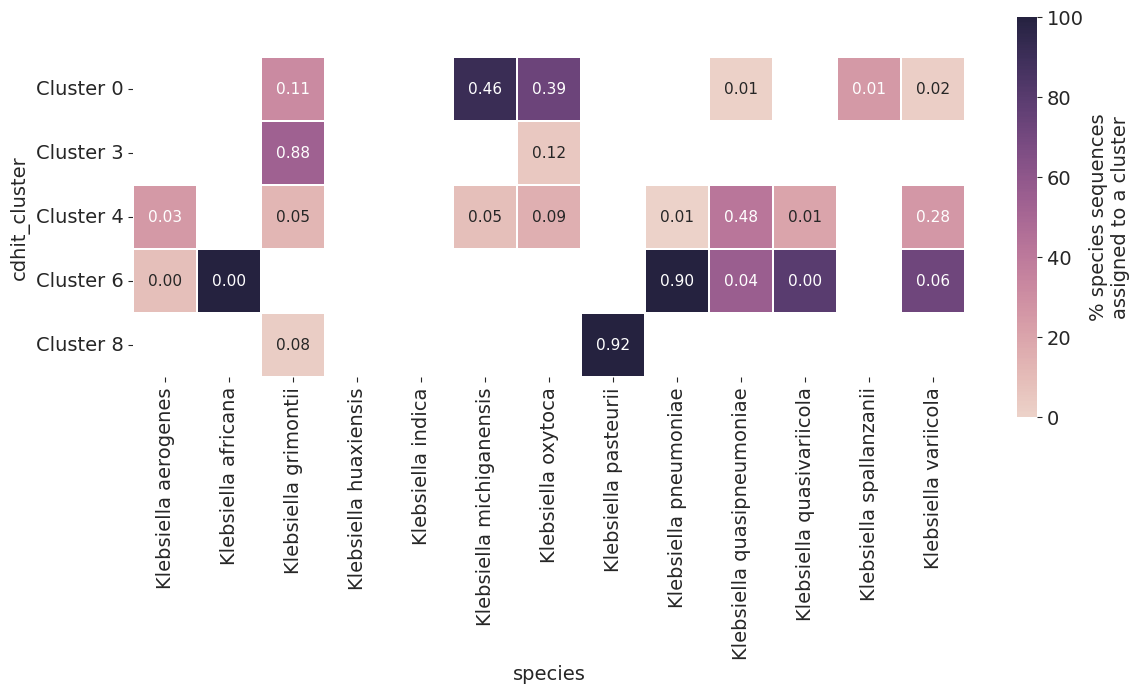

In [29]:
#| label: fig-fecA-heatmap
#| fig-cap: "*fecA*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

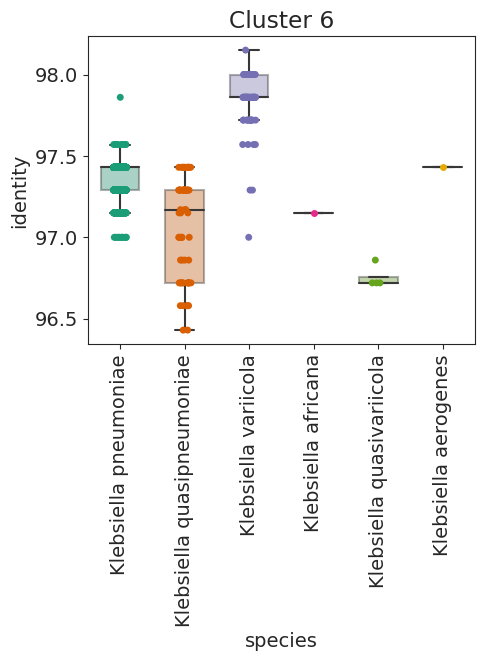

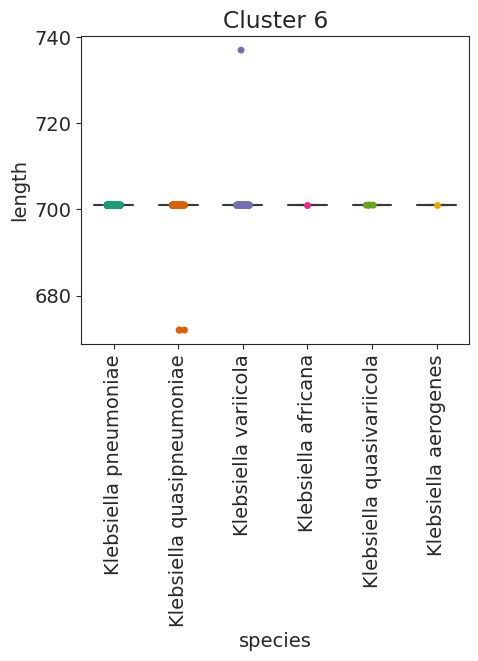

In [30]:
#| label: fig-fecA-big-Kp-clstr
#| fig-cap: "*fecA*. BLAST identity (compared to VTO23861.1, *K. variicola*, 737aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

### 98% minimum identity

In [25]:
%%capture
target = "fecA"
Kp_clstr = "1"
filename = "../" + target + "/" + target + ".Kp_cluster" + Kp_clstr + ".nonKp.cdhit98.tsv" 
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file=filename)

In [26]:
#| label: fecA-table-98
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella michiganensis                     51
              Klebsiella oxytoca                            1
              Klebsiella quasipneumoniae                    1
              Klebsiella variicola                          2
Cluster 1     Klebsiella grimontii                         35
              Klebsiella michiganensis                      2
              Klebsiella oxytoca                            4
Cluster 10    Klebsiella variicola                         23
Cluster 11    Klebsiella quasipneumoniae                    2
Cluster 12    Klebsiella grimontii                          1
              Klebsiella pasteurii                         12
Cluster 13    Klebsiella aerogenes                          7
Cluster 14    Klebsiella aerogenes                          1
Cluster 15    Klebsiella aerogenes                          1
              Klebsiella africana                           1
              Klebsiella pneumoniae                      1303
              Klebsiella quasipneumoniae                   65
              Klebsiella quasivariicola                     4
              Klebsiella variicola                         57
Cluster 16    Klebsiella oxytoca                            1
Cluster 2     Klebsiella oxytoca                           42
Cluster 3     Klebsiella huaxiensis                         1
              Klebsiella oxytoca                            1
Cluster 4     Klebsiella indica                             1
Cluster 5     Klebsiella spallanzanii                       4
Cluster 6     Klebsiella aerogenes                          2
              Klebsiella grimontii                          5
              Klebsiella michiganensis                      5
              Klebsiella oxytoca                            9
              Klebsiella pneumoniae                         1
              Klebsiella quasipneumoniae                   49
              Klebsiella quasivariicola                     1
              Klebsiella variicola                         14
Cluster 7     Klebsiella variicola                         15
Cluster 8     Klebsiella aerogenes                          1
Cluster 9     Klebsiella oxytoca                            2

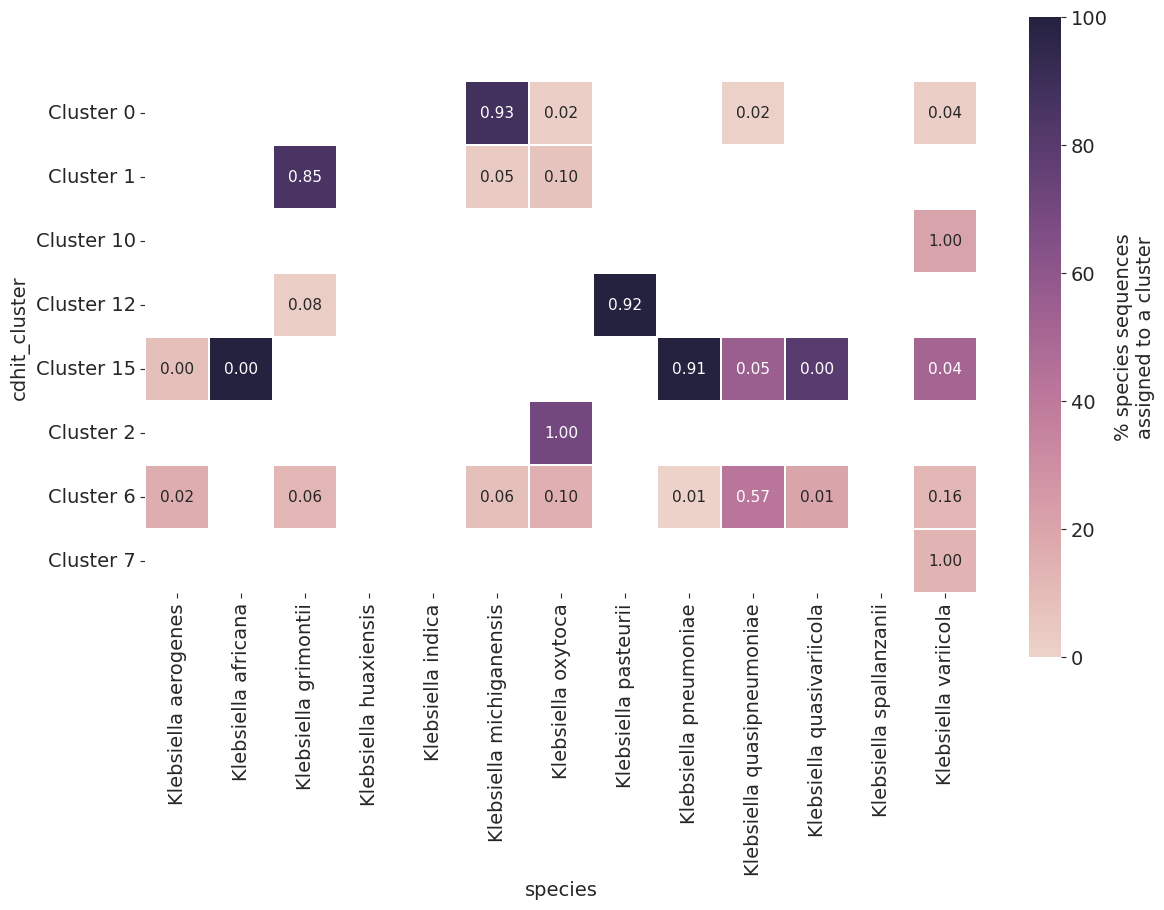

In [27]:
#| label: fig-fecA-heatmap-98
#| fig-cap: "*fecA*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

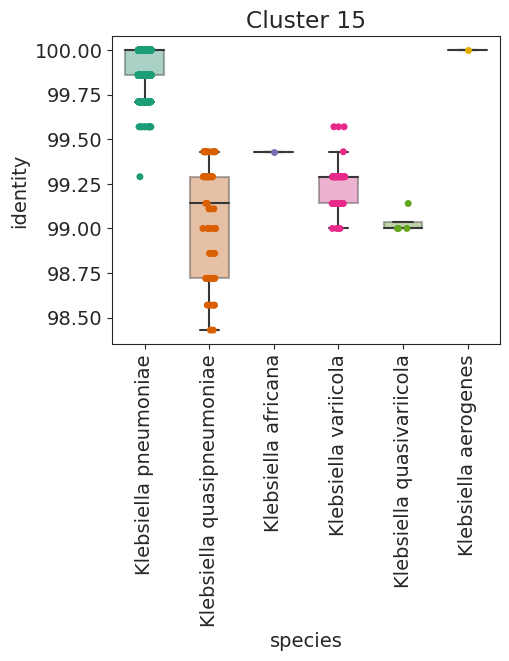

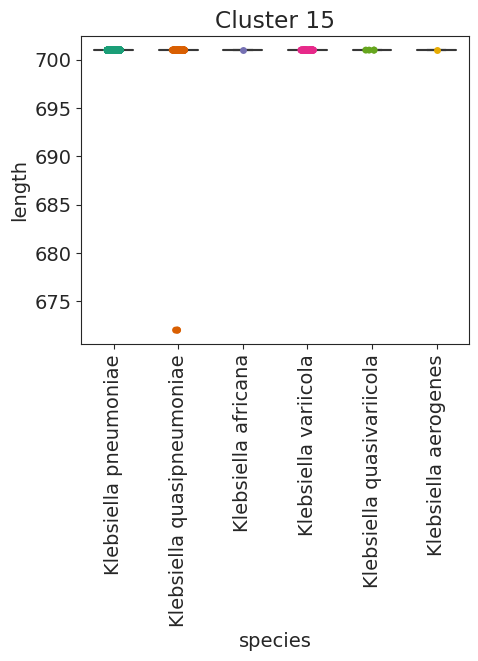

In [28]:
#| label: fig-fecA-big-Kp-clstr-98
#| fig-cap: "*fecA*. BLAST identity (compared to CAI3915550.1, *K. pneumoniae*, 701aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

# *fepB*

In [31]:
%%capture
target = "fepB"
Kp_clstr = "0"
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file=make_filename(target, Kp_clstr))

In [32]:
#| label: fepB-table
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella oxytoca                            1
Cluster 1     Klebsiella grimontii                         42
              Klebsiella michiganensis                     90
              Klebsiella oxytoca                           52
              Klebsiella pasteurii                         18
              Klebsiella spallanzanii                       4
Cluster 10    Klebsiella aerogenes                          2
Cluster 2     Klebsiella indica                             1
              Klebsiella oxytoca                            1
Cluster 3     Klebsiella aerogenes                          3
              Klebsiella africana                           6
              Klebsiella pneumoniae                      5223
              Klebsiella quasipneumoniae                  280
              Klebsiella quasivariicola                    18
              Klebsiella variicola                        218
Cluster 4     Klebsiella aerogenes                        101
Cluster 5     Klebsiella huaxiensis                         5
              Klebsiella oxytoca                            1
              Klebsiella spallanzanii                       2
Cluster 6     Klebsiella oxytoca                           26
Cluster 7     Klebsiella oxytoca                            2
Cluster 8     Klebsiella indica                             1
Cluster 9     Klebsiella oxytoca                            1

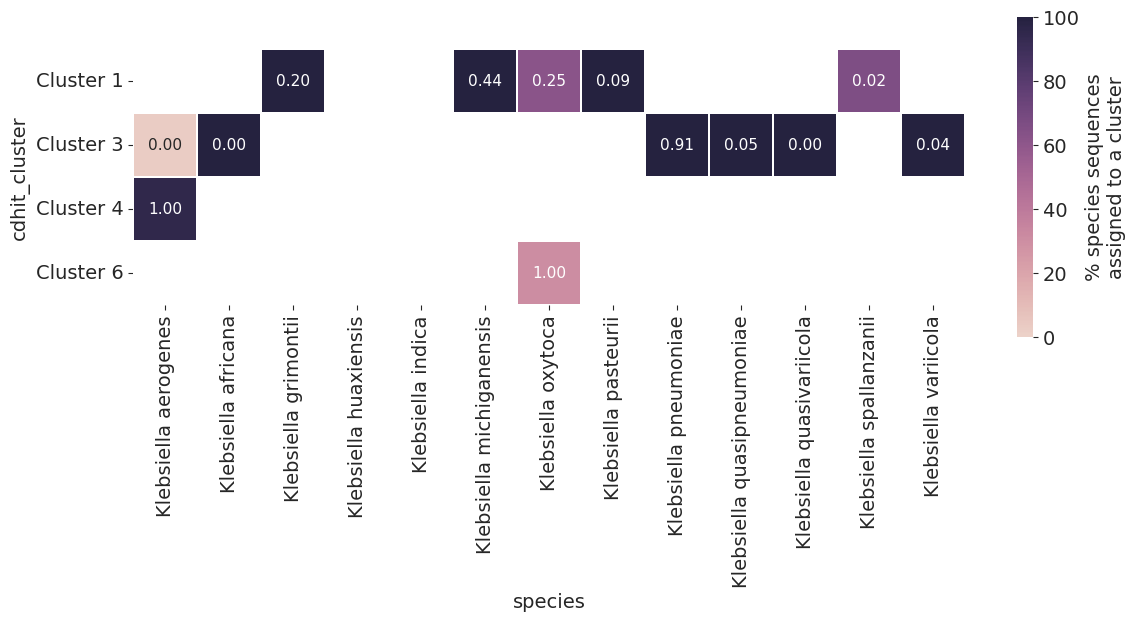

In [33]:
#| label: fig-fepB-heatmap
#| fig-cap: "*fepB*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

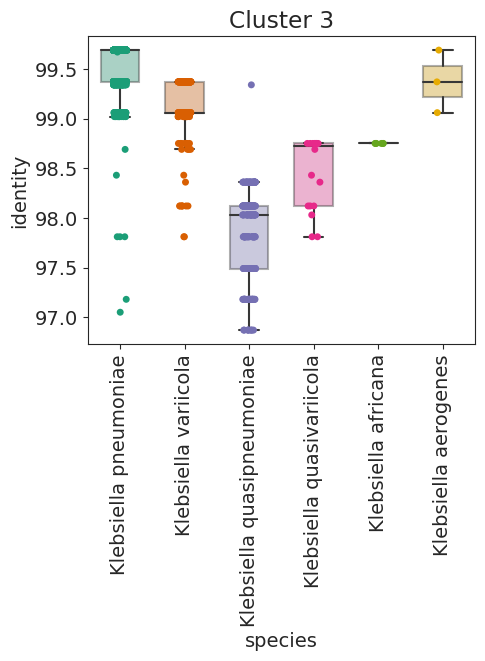

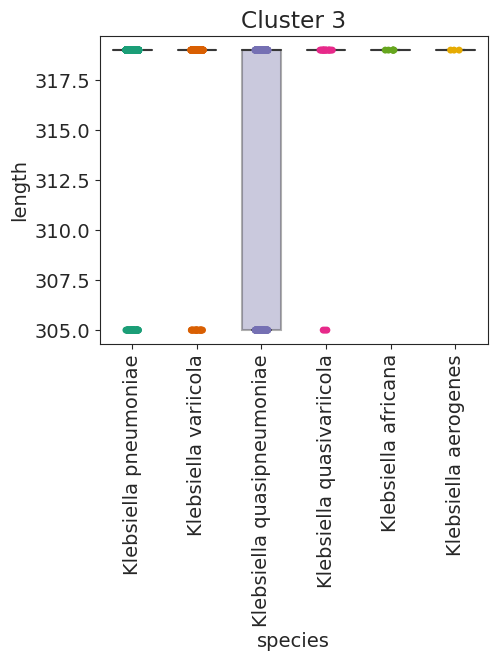

In [34]:
#| label: fig-fepB-big-Kp-clstr
#| fig-cap: "*fepB*. BLAST identity (compared to WP_285283454.1, *K. pneumoniae*, 319aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

# *cusC*

In [35]:
%%capture
target = "cusC"
Kp_clstr = "0"
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file=make_filename(target, Kp_clstr))

In [36]:
#| label: cusC-table
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella aerogenes                          9
              Klebsiella pneumoniae                      2771
              Klebsiella quasipneumoniae                   87
              Klebsiella quasivariicola                     5
              Klebsiella variicola                        108
Cluster 1     Klebsiella quasipneumoniae                   19
Cluster 2     Klebsiella oxytoca                            2
Cluster 3     Klebsiella grimontii                          1
              Klebsiella pasteurii                         12
Cluster 4     Klebsiella grimontii                          5
Cluster 5     Klebsiella michiganensis                     11
Cluster 6     Klebsiella oxytoca                           35
Cluster 7     Klebsiella grimontii                          1
              Klebsiella huaxiensis                         1
              Klebsiella oxytoca                            3
              Klebsiella pneumoniae                         1
              Klebsiella quasipneumoniae                   12
              Klebsiella variicola                          4
Cluster 8     Klebsiella oxytoca                            1
Cluster 9     Klebsiella michiganensis                      1

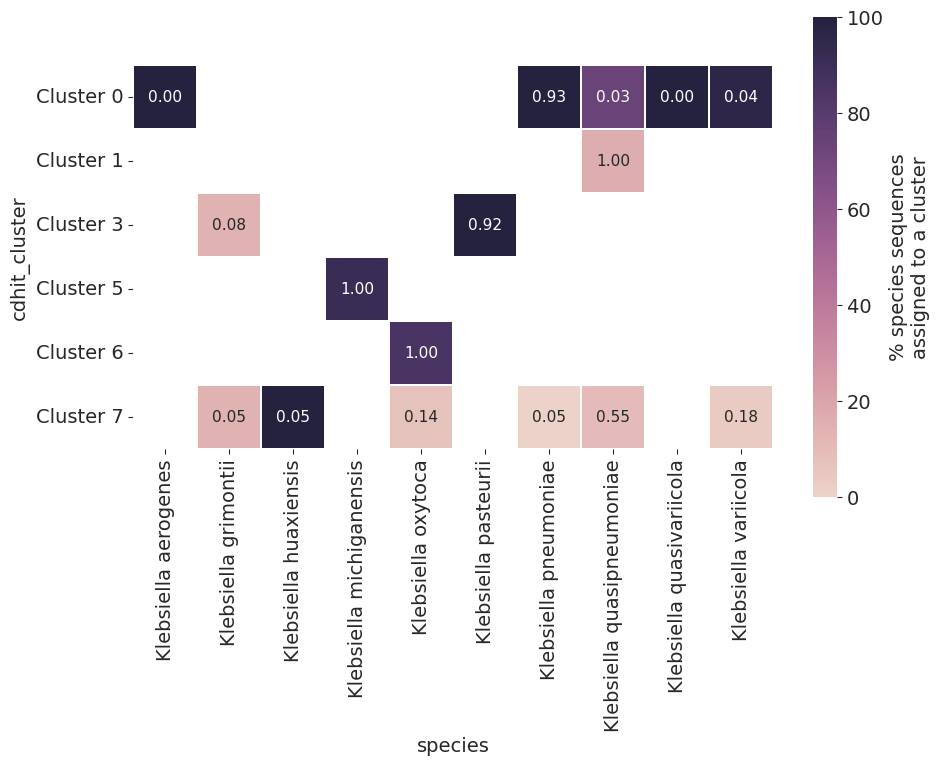

In [37]:
#| label: fig-cusC-heatmap
#| fig-cap: "*cusC*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

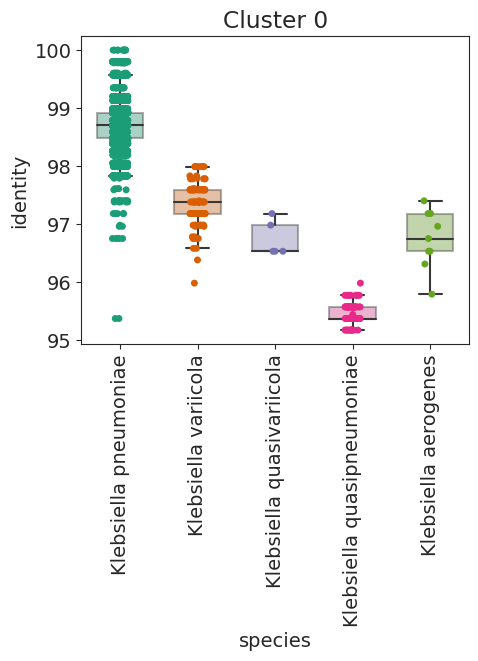

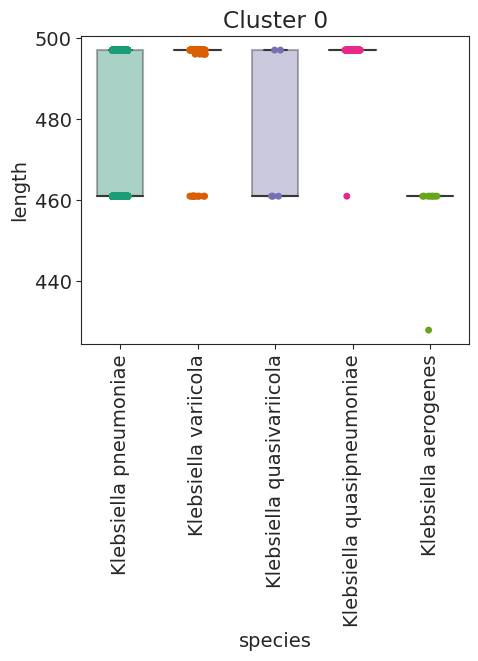

In [38]:
#| label: fig-cusC-big-Kp-clstr
#| fig-cap: "*cusC*. BLAST identity (compared to UMZ79738.1, *K. pneumoniae*, 497aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

# *ompN*

In [39]:
%%capture
target = "ompN"
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file="../ompN/ompN.Klebs.cdhit95.tsv")

In [40]:
#| label: ompN-table
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella aerogenes                          1
Cluster 1     Klebsiella pneumoniae                        35
              Klebsiella variicola                         11
Cluster 10    Klebsiella grimontii                          1
              Klebsiella huaxiensis                         3
              Klebsiella michiganensis                     15
              Klebsiella oxytoca                           39
              Klebsiella pasteurii                         10
              Klebsiella spallanzanii                       2
Cluster 11    Klebsiella variicola                          1
Cluster 12    Klebsiella grimontii                          1
Cluster 13    Klebsiella pneumoniae                         3
              Klebsiella quasipneumoniae                    2
              Klebsiella variicola                          4
Cluster 14    Klebsiella grimontii                          1
Cluster 15    Klebsiella variicola                          1
Cluster 2     Klebsiella grimontii                          6
              Klebsiella pasteurii                          2
Cluster 3     Klebsiella pneumoniae                        17
              Klebsiella variicola                          9
Cluster 4     Klebsiella aerogenes                          1
Cluster 5     Klebsiella quasipneumoniae                    4
Cluster 6     Klebsiella oxytoca                            1
Cluster 7     Klebsiella spallanzanii                       1
Cluster 8     Klebsiella oxytoca                            1
Cluster 9     Klebsiella quasipneumoniae                    4

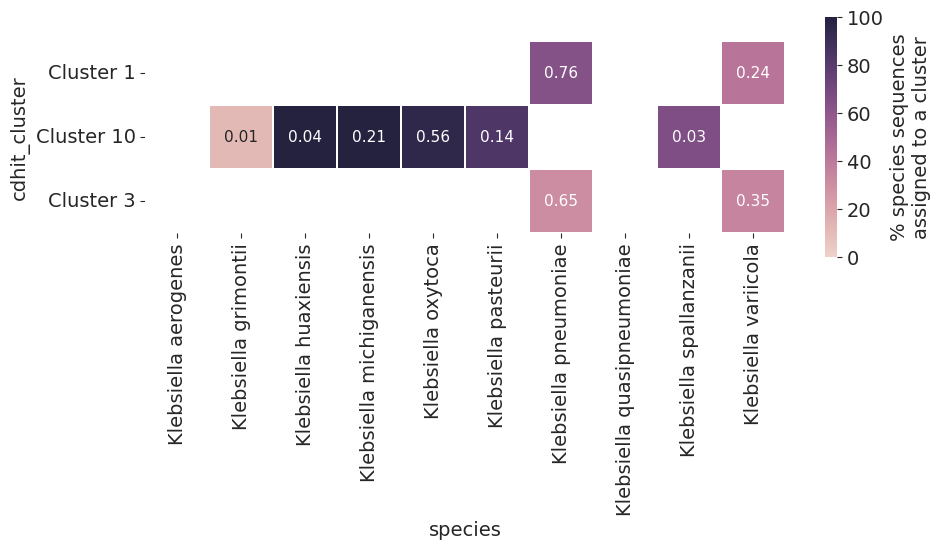

In [41]:
#| label: fig-ompN-heatmap
#| fig-cap: "*ompN*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

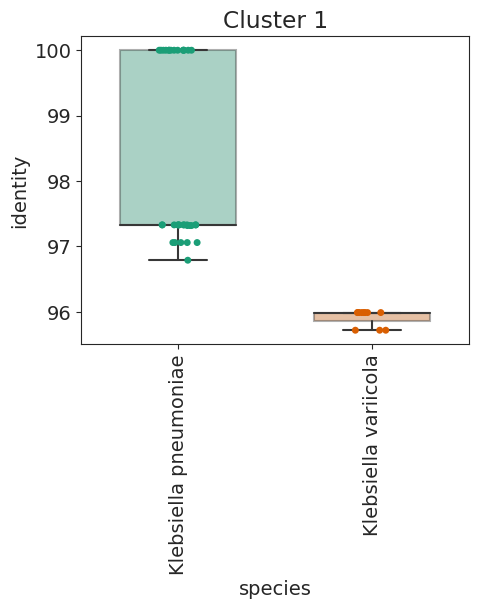

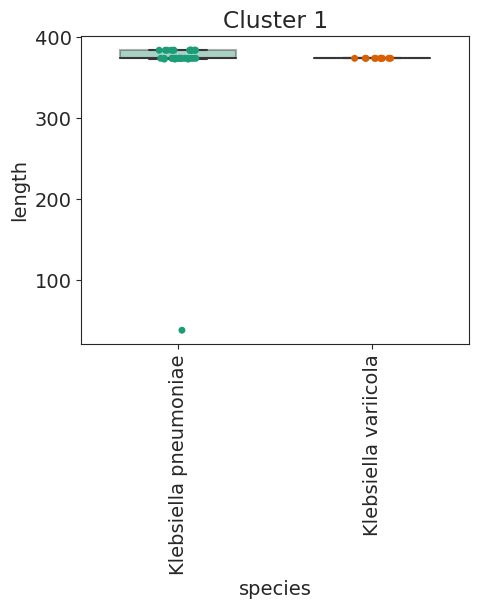

In [42]:
#| label: fig-ompN-big-Kp-clstr
#| fig-cap: "*ompN*. BLAST identity (compared to UMZ78267.1, *K. pneumoniae*, 384aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)

# *yidR*

In [43]:
%%capture
target = "yidR"
clstr_sp_count, f0, f1, f2 = analyze(clstr_table_file="../yidR/yidR.Klebs.cdhit95.tsv")

In [44]:
#| label: yidR-table
clstr_sp_count

number_of_sequences
cdhit_cluster species                                        
Cluster 0     Klebsiella variicola                          4
Cluster 1     Klebsiella pneumoniae                         9
              Klebsiella quasipneumoniae                    4
              Klebsiella variicola                          2
Cluster 2     Klebsiella variicola                          2
Cluster 3     Klebsiella grimontii                          1

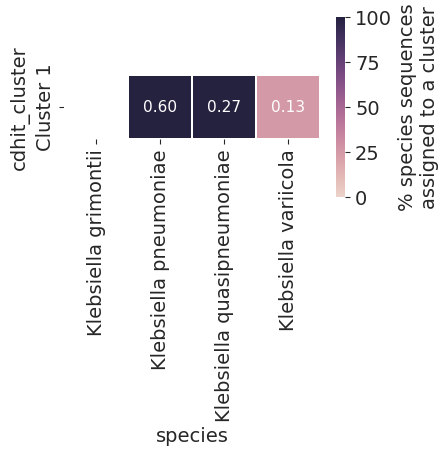

In [45]:
#| label: fig-yidR-heatmap
#| fig-cap: "*yidR*. Sequence ditributions of clusters with more than 10 sequences. Numbers in each cell indicate the proportion of a cluster made up by sequences of a species. Cell colors indicate the percentage of sequences of a species that were assigned to a cluster."
display(f0)

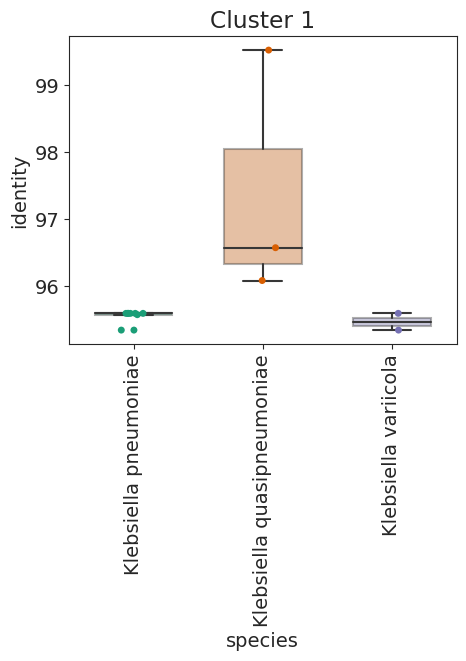

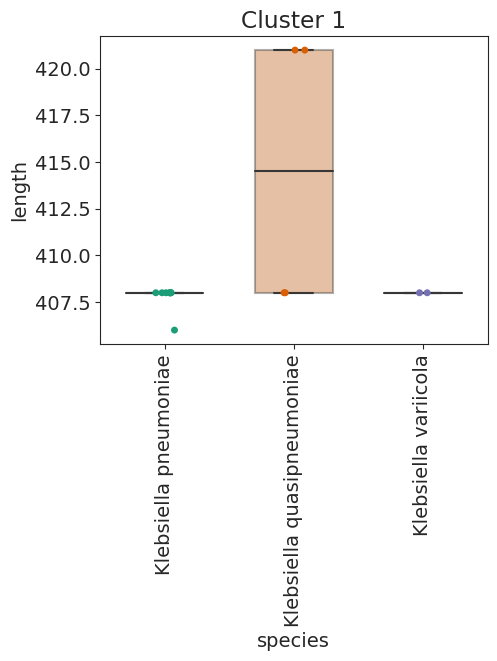

In [46]:
#| label: fig-yidR-big-Kp-clstr
#| fig-cap: "*yidR*. BLAST identity (compared to SAZ09645.1, *K. quasipneumoniae*, 421aa) & sequence length distributions across different species of the cluster where the majority of Kp sequences are in."
#| fig-subcap:
#|      - "Distributions of BLAST identities"
#|      - "Distributions of sequence lengths"
#| layout-ncol: 2
display(f1)
display(f2)